<a href="https://colab.research.google.com/github/Suriya6744/Project/blob/main/ARIMA_GARCH_SCG_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Data

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

##หุ้น PTT

In [ ]:
ptt = pd.read_csv('/content/drive/MyDrive/Project1/Project1/PTT Historical Data.csv')
ptt.shape

In [ ]:
ptt.head()

In [ ]:
ptt.isnull().any()

In [ ]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
ptt=ptt[['วันเดือนปี','ล่าสุด','ปริมาณ']]
# ptt['ปริมาณ']=ptt['ปริมาณ'].astype(str)

# #แทนที่ M ด้วยช่องว่าง
# ptt['ปริมาณ'] = ptt['ปริมาณ'].str.replace('M', '', regex=True)
# ptt['ปริมาณ']=ptt['ปริมาณ'].astype(float)

# # สร้างฟังก์ชันที่คูณค่าทุกค่าในคอลัมน์ด้วย 1,000,000
# def multiply_by_million(value):
#     return value * 1000000

# # ใช้ .apply() เพื่อคูณค่าในคอลัมน์ 'Column1' และ 'Column2' ด้วย 1,000,000
# ptt['ปริมาณ']=ptt['ปริมาณ'].apply(multiply_by_million)
# ptt['ปริมาณ']=ptt['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
ptt =ptt.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ptt',
                        'ปริมาณ': 'vol_ptt'})
ptt



In [ ]:
ptt['vol_ptt']=ptt['vol_ptt'].astype(str)

# #แทนที่ M ด้วยช่องว่าง
ptt['vol_ptt'] = ptt['vol_ptt'].str.replace('M', '', regex=True)
ptt['vol_ptt']=ptt['vol_ptt'].astype(float)

# # สร้างฟังก์ชันที่คูณค่าทุกค่าในคอลัมน์ด้วย 1,000,000
def multiply_by_million(value):
     return value * 1000000

# # ใช้ .apply() เพื่อคูณค่าในคอลัมน์ 'Column1' และ 'Column2' ด้วย 1,000,000
ptt['vol_ptt']=ptt['vol_ptt'].apply(multiply_by_million)
ptt['vol_ptt']=ptt['vol_ptt'].astype(int)
ptt

##หุ้น SCG

In [ ]:
scg = pd.read_csv('/content/drive/MyDrive/Project1/Project1/SCG Historical Data.csv')
scg.shape


In [ ]:
scg.head()

In [ ]:
scg.isnull().any()

In [ ]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
scg=scg[['วันเดือนปี','ล่าสุด','ปริมาณ']]

# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
# scg['ปริมาณ'] = scg['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
# scg['ปริมาณ']=scg['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
scg=scg.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_scg',
                        'ปริมาณ': 'vol_scg'})
scg

In [ ]:
scg['vol_scg'] = scg['vol_scg'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
scg['vol_scg']=scg['vol_scg'].astype(int)
scg

##หุ้น SOLAR

In [ ]:
solar = pd.read_csv('/content/drive/MyDrive/Project1/Project1/SOLAR Historical Data.csv')
solar.shape


In [ ]:
solar.head()

In [ ]:
solar.isnull().any()

In [ ]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
solar=solar[['วันเดือนปี','ล่าสุด','ปริมาณ']]

# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
# solar['ปริมาณ'] = solar['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
# solar['ปริมาณ']=solar['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
solar=solar.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_solar',
                        'ปริมาณ': 'vol_solar'})
solar

In [ ]:
# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
solar['vol_solar'] = solar['vol_solar'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
solar['vol_solar']=solar['vol_solar'].astype(int)
solar

## ราคาน้ำมันดิบ (WTI)

In [ ]:
wti = pd.read_csv('/content/drive/MyDrive/Project1/Project1/WTI_USD Historical Data.csv')
wti.shape

In [ ]:
wti.head()

In [ ]:
wti.isnull().any()

In [ ]:
wti.dtypes

In [ ]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
wti=wti[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
wti =wti .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_wti'})
wti

##ราคาทองคำ (XAU)

In [ ]:
xau = pd.read_csv('/content/drive/MyDrive/Project1/Project1/XAU_USD Historical Data.csv')
xau.shape

In [ ]:
xau.head()

In [ ]:
xau.isnull().any()

In [ ]:
xau.dtypes

In [ ]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
xau=xau[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
xau =xau .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_xau'})
xau['cp_xau'] = xau['cp_xau'].str.replace(',', '').astype(float)
xau

##อัตราแลกเปลี่ยน (EX)

In [ ]:
ex = pd.read_csv('/content/drive/MyDrive/Project1/Project1/USD_THB Historical Data.csv')
ex.shape

In [ ]:
ex.head()

In [ ]:
ex.isnull().any()

In [ ]:
ex.dtypes

In [ ]:
ex =ex .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ex'})
ex = ex[['date' ,'cp_ex']]
ex

##Date

In [ ]:
date = pd.read_csv('/content/drive/MyDrive/Project1/Project1/date.csv')
date

In [ ]:
date = date[['date']]
date

##Merge Table

In [ ]:
tm1 = date.merge(ptt, how ='left', left_on=['date',], right_on=['date',])
tm2 = tm1.merge(scg, how ='left', left_on=['date',], right_on=['date',])
tm3 = tm2.merge(solar, how ='left', left_on=['date',], right_on=['date',])
tm4 = tm3.merge(xau, how ='left', left_on=['date',], right_on=['date',])
tm5 = tm4.merge(ex, how ='left', left_on=['date',], right_on=['date',])
tm7 = tm5.merge(wti, how ='left', left_on=['date',], right_on=['date',])
all_data = tm7

In [ ]:
all_data

In [ ]:
all_data.isnull().any()

In [ ]:
all_data['date'] = all_data['date'].str.replace('/', '-')
all_data

In [ ]:
#all_data.to_csv('Project.csv', index=False)

##แทนค่าสูญหาย

In [ ]:
all_data.isnull().any()

In [ ]:
all_data.columns

In [ ]:
# ใช้ fillna() เพื่อแทนค่าว่างด้วยค่าก่อนหน้า
all_data.fillna(method='ffill', inplace=True)
all_data

In [ ]:
all_data.isnull().any()

In [ ]:
# คูณคอลัมน์ 'cp_wti' ด้วยคอลัมน์ 'cp_ex' เพื่อแปลงหน่วย USD ให้เป็น THB
all_data['cp_wti'] = all_data['cp_wti'] * all_data['cp_ex']
# คูณคอลัมน์ 'cp_xau ด้วยคอลัมน์ 'cp_ex' เพื่อแปลงหน่วย USD ให้เป็น THB
all_data['cp_xau'] = all_data['cp_xau'] * all_data['cp_ex']
all_data

In [ ]:
all_data = round(all_data, 2) #ทศนิยม 2 ตำแหน่ง
all_data

In [ ]:
# save data
all_data.to_csv('Project_data_eiei.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# กำหนดสีและ alpha สำหรับแต่ละคอลัมน์
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
         '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# สร้าง histogram สำหรับทุกคอลัมน์ที่เป็นตัวเลข
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(all_data.columns[1:]):
    ax = axes[i // 3, i % 3]
    n, bins, patches = ax.hist(all_data[col], bins=10, color=color[i], alpha=0.7, edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.grid(axis='y', alpha=0.75)
    ax.set_axisbelow(True)

    # เพิ่มเส้นแนะนำ (แบบเส้นกำกับ) สำหรับค่าเฉลี่ย
    mean_value = all_data[col].mean()
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.legend()

plt.show()

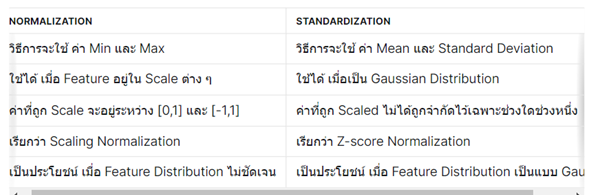

## Normalization

In [ ]:
all_data_X = all_data[['cp_wti', 'cp_ex', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg','vol_scg', 'cp_solar', 'vol_solar']]
all_data_X

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# สร้าง object MinMaxScaler
scaler = MinMaxScaler()

# Fit และ Transform ข้อมูล
normalized_data = scaler.fit_transform(all_data_X)

# สร้าง DataFrame ใหม่จากข้อมูลที่ปรับแล้ว
normalized_df = pd.DataFrame(normalized_data, columns=all_data_X.columns)

# สร้าง DataFrame ของคอลัมน์ 'date'
date = all_data[['date']]

# รวม DataFrame ของ 'date' และ DataFrame ของข้อมูลที่แทนค่าสูญหาย
cm_df = pd.concat([date, normalized_df], axis=1)
cm_df


In [ ]:
#หาความสัมพันธ์
correlation_matrix = normalized_df.corr()
correlation_matrix

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
for column in normalized_df.columns:
    plt.plot(normalized_df.index, normalized_df[column], marker='o', linestyle='-', label=column)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('All Columns Plot')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#ARIMA-GARCH (SCG)

##แบ่งข้อมูล

In [ ]:
# all_ptt = cm_df[['cp_ptt',"cp_wti","cp_ex","cp_xau","vol_ptt"]]

In [ ]:
#ใช้กับ ARIMA-GARCH
# a_train = all_ptt.iloc[:522]
# a_test = all_ptt.iloc[523:,:]

In [ ]:
#ใช้กับ ARIMA
arima_scg  = cm_df[['cp_scg']]
msk = (arima_scg.index < len(arima_scg) -43)
df_train = arima_scg[msk].copy()
df_test = arima_scg[~msk].copy()

##เช็ค Stationary

In [ ]:
import requests

font_url = "https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf"
local_filename = "thsarabunnew-webfont.ttf"

response = requests.get(font_url, stream=True)

if response.status_code == 200:
    with open(local_filename, 'wb') as file:
        for chunk in response.iter_content(chunk_size=128):
            file.write(chunk)

    print(f"Font downloaded successfully as {local_filename}")
else:
    print(f"Failed to download font. HTTP Status Code: {response.status_code}")

In [ ]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New' , size=10)

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import pandas as pd

# สร้าง subplot 2x1
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# วาดกราฟของ 'cp_ptt' ใน subplot แรก
axes[0].plot(df_train, label='cp_scg')
axes[0].set_title('Close Price for SCG')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Close Price')

# พล็อตกราฟ ACF ใน subplot ที่สอง
sm.graphics.tsa.plot_acf(df_train, lags=130, ax=axes[1], marker=' ')  # เปลี่ยนคอลัมน์ให้ตรงกับข้อมูลจริง
axes[1].set_title('ACF ของราคาปิดหุ้น SCG')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('ACF')

# แสดงกราฟเทียบระหว่างกราฟข้อมูลจริงกับกราฟ ACF
plt.tight_layout()
plt.show()



###ทดสอบ ADF

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


# ทำ ADF Test
adf_result = adfuller(df_train)

# แสดงผลลัพธ์
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])
#ค่า ADF Statistic มากกว่า Critical Values = ไม่นิ่ง

###Different 1

###ACF_scg_diff

In [ ]:
# ลบค่าก่อนหน้าเพื่อทำให้ข้อมูล stationary
#ใชการแปลงอนุกรมเวลาให้มีค่าเฉลี่ยคงที่โดยหาผลต่างครั้งที่ d=1
import numpy as np
df_train['cp_scg_diff'] = df_train['cp_scg'].diff()
df_train.replace(np.nan, 0, inplace=True)
#a_train.dropna(inplace=True)  # ลบแถวที่มีค่าที่ขาดหาย

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import pandas as pd

# สร้าง subplot 2x1
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# วาดกราฟของ 'cp_ptt' ใน subplot แรก
axes[0].plot(df_train['cp_scg_diff'], label='cp_scg_diff')
axes[0].set_title('ผลต่างของราคาปิดหุ้น SCG ครั้งที่ 1')
axes[0].set_xlabel('วันที่')
axes[0].set_ylabel('ราคาปิด')

# พล็อตกราฟ ACF ใน subplot ที่สอง
sm.graphics.tsa.plot_acf(df_train['cp_scg_diff'], lags=141, ax=axes[1], marker=' ')  # เปลี่ยนคอลัมน์ให้ตรงกับข้อมูลจริง
axes[1].set_title('ACF ของราคาปิดหุ้น SCG จากการหาผลต่างครั้งที่ 1')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('ACF')

# แสดงกราฟเทียบระหว่างกราฟข้อมูลจริงกับกราฟ ACF
plt.tight_layout()
plt.show()


In [ ]:
# ทำ ADF Test อีกครั้ง
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_train['cp_scg_diff'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])
#เนื่องจากค่า ADF Statistic น้อยกว่า Critical Values แสดงว่าข้อมูลนิ่งแล้ว

##กำหนดตัวแบบ

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import pandas as pd

# สร้าง subplot 2x1
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# พล็อตกราฟ ACF ใน subplot แรก
plot_acf(df_train['cp_scg_diff'], lags=130, ax=axes[0], marker=' ')
axes[0].set_title('ACF Residual ของราคาปิดหุ้น SCG')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')

# พล็อตกราฟ PACF ใน subplot ที่สอง
plot_pacf(df_train['cp_scg_diff'], lags=130, ax=axes[1], marker=' ')
axes[1].set_title('PACF Residual ของราคาปิดหุ้น SCG')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')

# แสดงกราฟเทียบระหว่าง ACF และ PACF
plt.tight_layout()
plt.show()


##ประมาณค่าพารามิเตอร์

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# สร้างแบบจำลอง ARIMA
model = ARIMA(df_train['cp_scg'], order=(0, 1, 3))
# model = ARIMA(df_train['cp_scg'], order=(p,d,q),trend='t)
# ปรับโมเดล
results = model.fit()

# ดูสรุปของโมเดล
print(results.summary())


In [ ]:
# forecast_test = results.forecast(len(df_test))
# arima_ptt['fore_man'] = [None]*len(df_train)+list(forecast_test)
# arima_ptt.plot()

In [ ]:
# predictions.to_csv('predictions.csv', index=False)

## RMSE MAPE ของ ARIMA

In [ ]:
#forecasting train data
predictions = results.predict(start=0, end=len(df_train['cp_scg']) - 1)

In [ ]:
import pandas as pd
arima_data = pd.DataFrame({'Actual': df_train['cp_scg'], 'Forecast': predictions})
arima_data

In [ ]:
max_original = all_data_X['cp_scg'].max()  # Max Value ของข้อมูลเดิม
min_original = all_data_X['cp_scg'].min()  # Min Value ของข้อมูลเดิม

arima_data['Actual'] = (arima_data['Actual'] * (max_original - min_original)) +min_original
arima_data['Forecast'] = (arima_data['Forecast'] * (max_original - min_original)) + min_original
arima_data

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(arima_data['Actual'], arima_data['Forecast'])
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) : {rmse:.4}")

n = len(arima_data['Actual'])
mape = (1/n) * np.sum(np.abs((arima_data['Actual'] - arima_data['Forecast']) /arima_data['Actual'])) *100
print(f"Mean Absolute Percentage Error (MAPE) :{mape:.4}%")

##ประมาณค่า GARCH

In [ ]:
!pip install pmdarima
!pip install arch

In [ ]:
garch_x = cm_df[["cp_wti","cp_ex","cp_xau","vol_scg"]]
garch_y = cm_df[["cp_scg"]]

#ใช้กับ ARIMA-GARCH
X_train = garch_x.iloc[:522,:]
X_test = garch_x.iloc[522:,:]
y_train = garch_y.iloc[:522]
y_test = garch_y.iloc[522:]


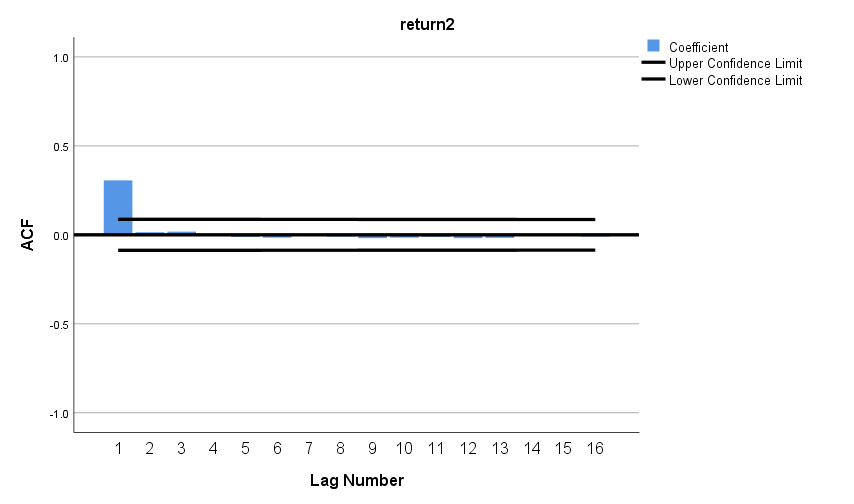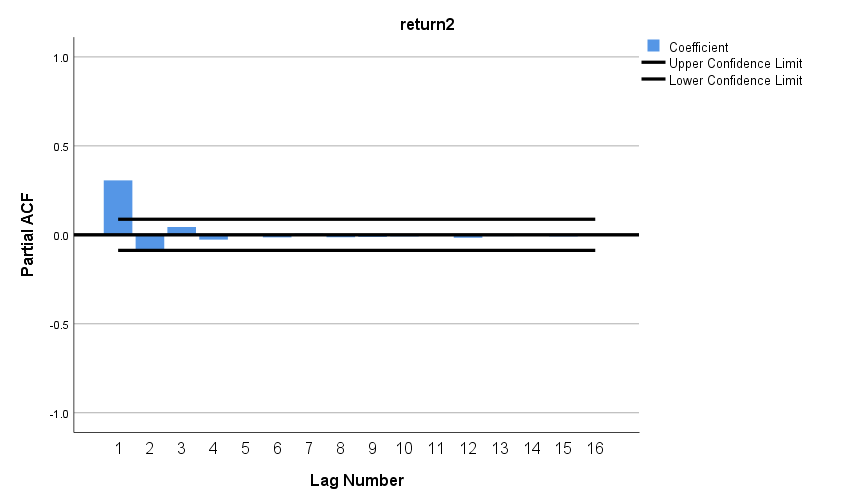

In [ ]:

import numpy as np
import pandas as pd
from arch import arch_model
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

#ARIMA
arima_residuals = results.resid

# สร้าง GARCH
exog_data = X_train[['cp_ex', 'cp_xau', 'vol_scg','cp_wti']]
garch_model = arch_model(arima_residuals, vol='Garch', p=1, q=0, x=exog_data,mean='zero')
garch_results = garch_model.fit()
print(garch_results.summary())

## RMSE MAPE ของ GARCH

In [ ]:
import pandas as pd
import numpy as np
forecast_g_rmma = garch_results.forecast(horizon=len(X_train))
forecast_g_rmma = np.sqrt(forecast_g_rmma.variance.values[-1,:])

In [ ]:
forecast_g_rmma = pd.DataFrame({'ค่าจริง': df_train['cp_scg'], 'ค่าพยากรณ์': forecast_g_rmma})
forecast_g_rmma

In [ ]:
max_original = all_data_X['cp_scg'].max()  # Max Value ของข้อมูลเดิม
min_original = all_data_X['cp_scg'].min()  # Min Value ของข้อมูลเดิม

forecast_g_rmma['ค่าจริง'] = (forecast_g_rmma['ค่าจริง'] * (max_original - min_original)) +min_original
forecast_g_rmma['ค่าพยากรณ์'] = (forecast_g_rmma['ค่าพยากรณ์'] * (max_original - min_original)) + min_original
forecast_g_rmma.shape

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(forecast_g_rmma['ค่าจริง'], forecast_g_rmma['ค่าพยากรณ์'])
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) : {rmse:.4}")

n = len(forecast_g_rmma['ค่าจริง'])
mape = (1/n) * np.sum(np.abs((forecast_g_rmma['ค่าจริง'] - forecast_g_rmma['ค่าพยากรณ์']) /forecast_g_rmma['ค่าจริง'])) *100
print(f"Mean Absolute Percentage Error (MAPE) :{mape:.4}%")

#ARIMA-GARCH Test

In [ ]:
forecast_test = results.forecast(len(df_test))
arima_scg['fore_man'] = [None]*len(df_train)+list(forecast_test)
# arima_scg.plot()
arima_scg_fore = arima_scg['fore_man'].iloc[522:]


In [ ]:
#รวม ARIMA-GARCH
predict = garch_results.forecast(horizon=43)
garch_scg_fore = np.sqrt(predict.variance.values[-1,:])
arima_garch_test = arima_scg_fore + garch_scg_fore

In [ ]:
import matplotlib.pyplot as plt


# พล็อตกราฟ
plt.figure(figsize=(12, 6))
plt.plot(arima_scg['cp_scg'], label='Actual', color='blue')
plt.plot(arima_garch_test, label='Forecast', color='orange')
plt.title('ARIMA-GARCH Forecast')
plt.xlabel('Date')
plt.ylabel('cp_scg')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

arima_garch_test = pd.DataFrame({'ค่าจริง': df_test['cp_scg'], 'ค่าพยากรณ์': arima_garch_test})
arima_garch_test.head

###RMSE MAPE ของ ARIMA-GARCH Test

In [ ]:
max_original = all_data_X['cp_scg'].max()  # Max Value ของข้อมูลเดิม
min_original = all_data_X['cp_scg'].min()  # Min Value ของข้อมูลเดิม

arima_garch_test['ค่าจริง'] = (arima_garch_test['ค่าจริง'] * (max_original - min_original)) +min_original
arima_garch_test['ค่าพยากรณ์'] = (arima_garch_test['ค่าพยากรณ์'] * (max_original - min_original)) + min_original
arima_garch_test.shape

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(arima_garch_test['ค่าจริง'], arima_garch_test['ค่าพยากรณ์'])
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) : {rmse:.4}")

n = len(arima_garch_test['ค่าจริง'])
mape = (1/n) * np.sum(np.abs((arima_garch_test['ค่าจริง'] - arima_garch_test['ค่าพยากรณ์']) /arima_garch_test['ค่าจริง'])) *100
print(f"Mean Absolute Percentage Error (MAPE) :{mape:.4}%")

In [ ]:
#arima_garch_test.to_csv('arima_garch.csv', index=False)

#ARIMA-GARCH Train

In [ ]:
forecast_g = garch_results.forecast(horizon=len(X_train))
garch_scg_fore_g = np.sqrt(forecast_g.variance.values[-1,:])

In [ ]:
#รวม ARIMA-GARCH

arima_garch_train = predictions + garch_scg_fore_g

In [ ]:
import matplotlib.pyplot as plt


# พล็อตกราฟ
plt.figure(figsize=(12, 6))
plt.plot(arima_scg['cp_scg'], label='Actual', color='blue')
plt.plot(arima_garch_train, label='Forecast', color='orange')
plt.title('ARIMA-GARCH Forecast')
plt.xlabel('Date')
plt.ylabel('cp_scg')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

arima_garch_train = pd.DataFrame({'ค่าจริง': df_train['cp_scg'], 'ค่าพยากรณ์': arima_garch_train})
arima_garch_train.head

###RMSE MAPE ของ ARIMA-GARCH Train

In [ ]:
max_original = all_data_X['cp_scg'].max()  # Max Value ของข้อมูลเดิม
min_original = all_data_X['cp_scg'].min()  # Min Value ของข้อมูลเดิม

arima_garch_train['ค่าจริง'] = (arima_garch_train['ค่าจริง'] * (max_original - min_original)) +min_original
arima_garch_train['ค่าพยากรณ์'] = (arima_garch_train['ค่าพยากรณ์'] * (max_original - min_original)) + min_original
arima_garch_train.shape

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(arima_garch_train['ค่าจริง'], arima_garch_train['ค่าพยากรณ์'])
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) : {rmse:.4}")

n = len(arima_garch_train['ค่าจริง'])
mape = (1/n) * np.sum(np.abs((arima_garch_train['ค่าจริง'] - arima_garch_train['ค่าพยากรณ์']) /arima_garch_train['ค่าจริง'])) *100
print(f"Mean Absolute Percentage Error (MAPE) :{mape:.4}%")